In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()
X_ = data["data"]
y = data["target"]

نرمالیزه نموده و از تحلیل مولفه های اصلی استفاده نمایید و 4 ستون اصلی را ایجاد کنید

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X_)

In [4]:
pca = PCA(n_components=4)
X4d = pca.fit_transform(X)

در صفحه ای نمودار های اسکتر (نقطه ای، پراکندگی) دو به دو ستون ها را در برابر هم نمایش دهید

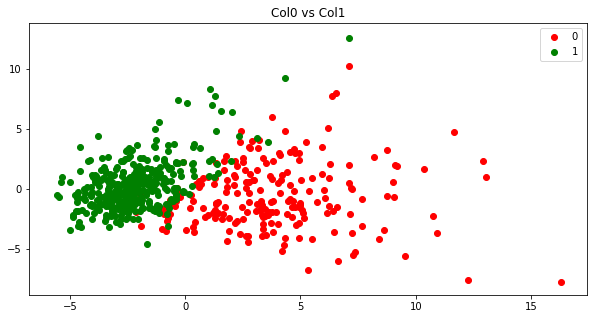

In [5]:
target_ids = [0, 1]
plt.figure(figsize=(10, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, ["0", "1"]):
    plt.scatter(X4d[y == i, 0], X4d[y == i, 1], c=c, label=label)
plt.legend()
plt.title('Col0 vs Col1')
plt.show()

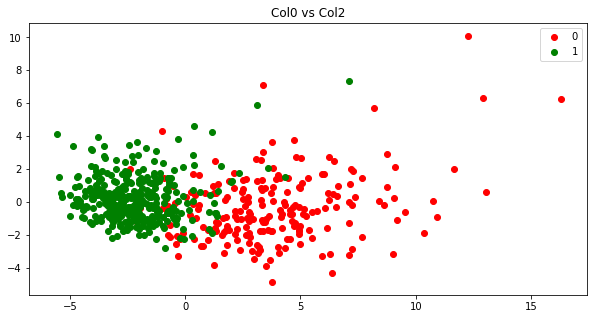

In [6]:
target_ids = [0, 1]
plt.figure(figsize=(10, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, ["0", "1"]):
    plt.scatter(X4d[y == i, 0], X4d[y == i, 2], c=c, label=label)
plt.legend()
plt.title('Col0 vs Col2')
plt.show()

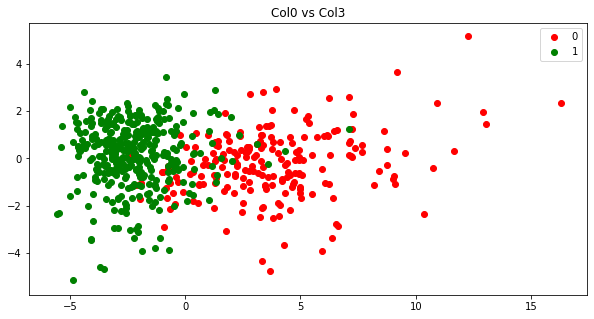

In [7]:
target_ids = [0, 1]
plt.figure(figsize=(10, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, ["0", "1"]):
    plt.scatter(X4d[y == i, 0], X4d[y == i, 3], c=c, label=label)
plt.legend()
plt.title('Col0 vs Col3')
plt.show()

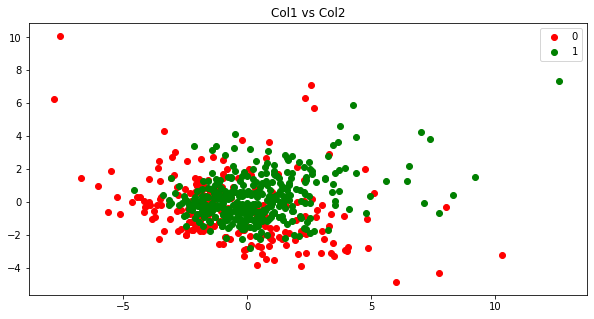

In [8]:
target_ids = [0, 1]
plt.figure(figsize=(10, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, ["0", "1"]):
    plt.scatter(X4d[y == i, 1], X4d[y == i, 2], c=c, label=label)
plt.legend()
plt.title('Col1 vs Col2')
plt.show()

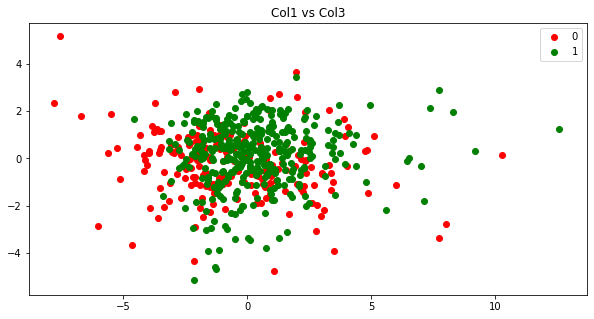

In [9]:
target_ids = [0, 1]
plt.figure(figsize=(10, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, ["0", "1"]):
    plt.scatter(X4d[y == i, 1], X4d[y == i, 3], c=c, label=label)
plt.legend()
plt.title('Col1 vs Col3')
plt.show()

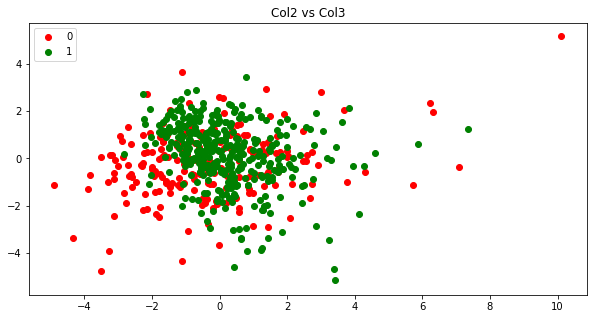

In [10]:
target_ids = [0, 1]
plt.figure(figsize=(10, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, ["0", "1"]):
    plt.scatter(X4d[y == i, 2], X4d[y == i, 3], c=c, label=label)
plt.legend()
plt.title('Col2 vs Col3')
plt.show()

داده را بر اساس 30 درصد تست و 70 درصد آموزش تقسیم نموده و 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

با ماشین های بردار پشتیبان آموزش داده و گزارشات مناسب دسته بندی باینری را نمایش دهید 

In [12]:
def report(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"Train accuracy is: {train_acc}\nTest accuracy: {test_acc}")

In [13]:
svm1 = SVC().fit(X_train, y_train)
report(svm1, X_train, X_test, y_train, y_test)

Train accuracy is: 0.9874371859296482
Test accuracy: 0.9707602339181286


GridSearch

In [14]:
param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly']} 
  
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

report(grid, X_train, X_test, y_train, y_test)

Train accuracy is: 0.9899497487437185
Test accuracy: 0.9766081871345029


با استفاده از الگوریتم نزدیکترین همسایه با همان توزیع 30 درصدی و 4 مولفه ای مدل طبقه بند ایجاد نمایید

In [15]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(X_train,y_train)
report(knn1, X_train, X_test, y_train, y_test)

Train accuracy is: 0.9824120603015075
Test accuracy: 0.9532163742690059


In [16]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

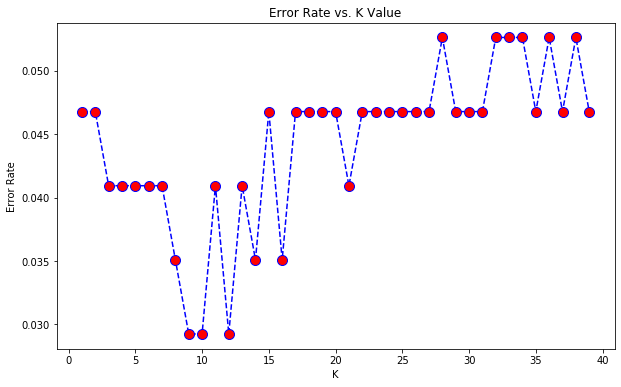

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [18]:
knn2 = KNeighborsClassifier(n_neighbors = 9)
knn2.fit(X_train,y_train)
report(knn2, X_train, X_test, y_train, y_test)

Train accuracy is: 0.9723618090452262
Test accuracy: 0.9707602339181286


مقدار بهینه برای همسایگی

KNN
best k=9,10, 12